<a href="https://colab.research.google.com/github/fboldt/aulasann/blob/main/aula9a_mnist_flat_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


10000

In [3]:
print(train_images.shape, "\n",
      len(train_labels), "\n",
      train_labels, "\n",
      test_images.shape, "\n",
      len(test_labels))

(60000, 28, 28) 
 60000 
 [5 0 4 ... 5 6 8] 
 (10000, 28, 28) 
 10000


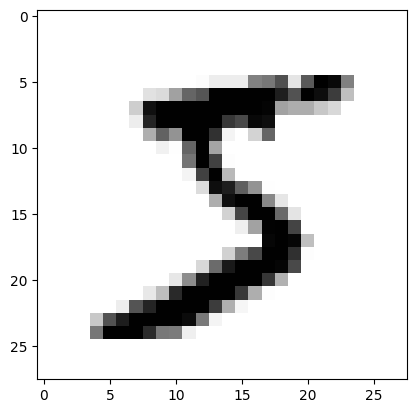

In [4]:
from matplotlib import pyplot as plt
digit = train_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [5]:
train_labels[0]

np.uint8(5)

In [6]:
train_flat_images = train_images.reshape((60000, 28 * 28))
test_flat_images = test_images.reshape((10000, 28 * 28))
train_flat_images.shape

(60000, 784)

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(train_flat_images, train_labels, epochs=5, batch_size=128)

test_loss, test_acc = model.evaluate(test_flat_images, test_labels)
print(f"test_loss:\t {test_loss}")
print(f"test_acc:\t {test_acc}")

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8408 - loss: 14.4729
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9511 - loss: 0.7113
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9656 - loss: 0.4102
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9719 - loss: 0.3165
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9769 - loss: 0.2925
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9603 - loss: 0.7360
test_loss:	 0.6782798171043396
test_acc:	 0.9642999768257141


In [9]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score
import numpy as np

def BasicKerasNN(num_classes):
  return keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
  ])


class KerasWrappedNN(BaseEstimator, ClassifierMixin):
  def __init__(self, epochs=5, batch_size=128, model_fabric=BasicKerasNN):
    self.epochs = epochs
    self.batch_size = batch_size
    self.model_fabric = model_fabric

  def fit(self, X, y):
    self.labels, ids = np.unique(y, return_inverse=True)
    yhot = keras.utils.to_categorical(ids, len(self.labels))
    self.model = self.model_fabric(len(self.labels))
    self.model.compile(optimizer="rmsprop",
                       loss="categorical_crossentropy",
                       metrics=["accuracy"])
    self.model.fit(X, yhot, epochs=self.epochs, batch_size=self.batch_size)
    return self

  def predict(self, X):
    probabilities = self.model.predict(X)
    return self.labels[np.argmax(probabilities, axis=1)]

modelo = KerasWrappedNN()
modelo.fit(train_flat_images, train_labels)
ypred = modelo.predict(test_flat_images)
accuracy_score(test_labels, ypred)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8367 - loss: 15.5037
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9509 - loss: 0.7790
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9655 - loss: 0.4239
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9724 - loss: 0.3418
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9770 - loss: 0.2722
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


0.9623

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

pipeline = Pipeline([
    ("scaler", MinMaxScaler()),
    ("modelo", KerasWrappedNN())
])

pipeline.fit(train_flat_images, train_labels)
ypred = pipeline.predict(test_flat_images)
accuracy_score(test_labels, ypred)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8706 - loss: 0.4463
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9662 - loss: 0.1174
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9795 - loss: 0.0701
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9844 - loss: 0.0512
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9887 - loss: 0.0375
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


0.9788

In [12]:
from sklearn.base import TransformerMixin

class Divide255(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X / 255.0

pipeline = Pipeline([
    ("scaler", Divide255()),
    ("modelo", KerasWrappedNN())
])

pipeline.fit(train_flat_images, train_labels)
ypred = pipeline.predict(test_flat_images)
accuracy_score(test_labels, ypred)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8720 - loss: 0.4412
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9666 - loss: 0.1165
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9790 - loss: 0.0711
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9853 - loss: 0.0505
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9891 - loss: 0.0369
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


0.9798

In [13]:
class Shape2Flat(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X.reshape((-1, 28 * 28))

pipeline = Pipeline([
    ("scaler", Divide255()),
    ("shape2flat", Shape2Flat()),
    ("modelo", KerasWrappedNN())
])

pipeline.fit(train_images, train_labels)
ypred = pipeline.predict(test_images)
accuracy_score(test_labels, ypred)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8707 - loss: 0.4404
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9676 - loss: 0.1126
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9791 - loss: 0.0715
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9855 - loss: 0.0500
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9896 - loss: 0.0357
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


0.9786